Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Libraries loaded successfully!

Dataset loaded successfully!

Dataset dimensions:
[1] 32 12

First 6 rows of data:


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,car_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4
2,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 Wag
3,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,Datsun 710
4,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
5,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,Hornet Sportabout
6,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,Valiant



Summary statistics:


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb         car_name        
 Min.   :0.000


Data cleaning completed!


`geom_smooth()` using formula = 'y ~ x'


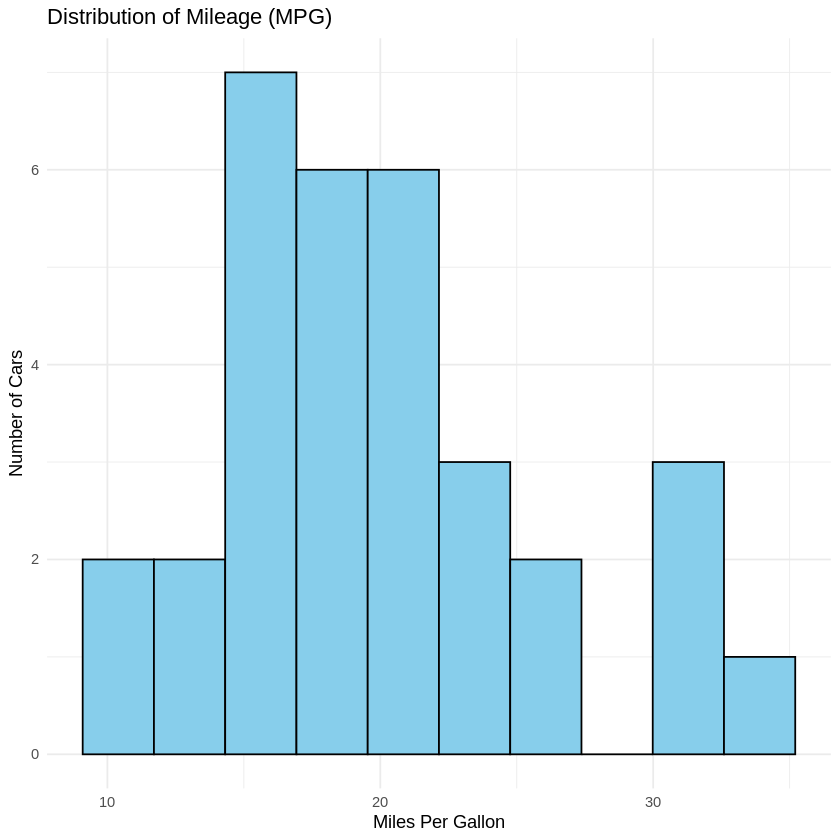

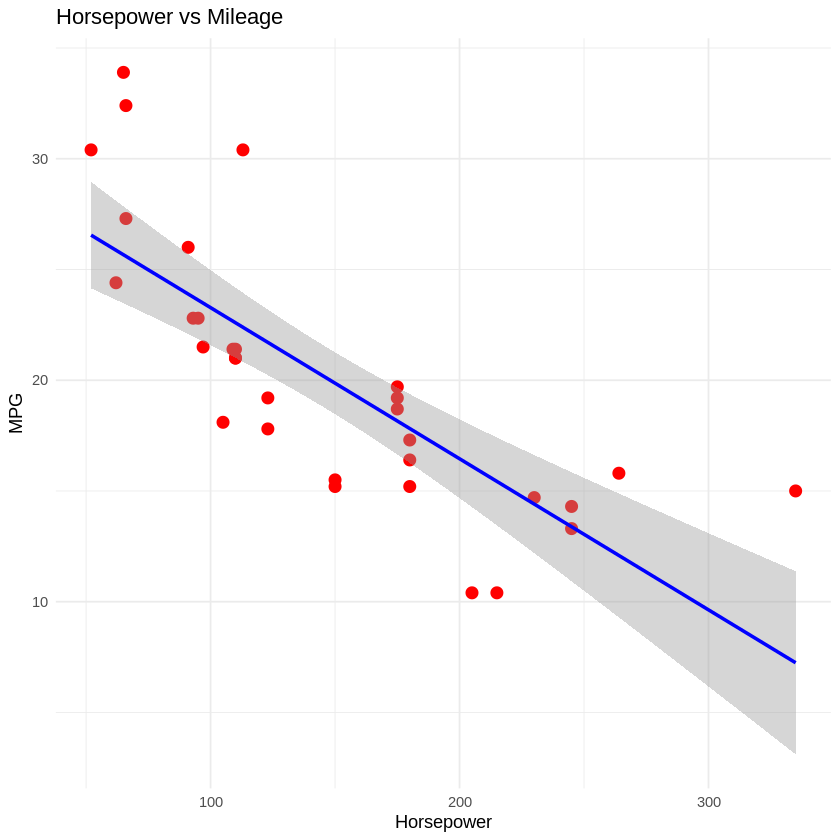


Correlation Matrix:
       mpg  disp    hp  drat    wt  qsec    vs  carb
mpg   1.00 -0.85 -0.78  0.68 -0.87  0.42  0.66 -0.55
disp -0.85  1.00  0.79 -0.71  0.89 -0.43 -0.71  0.39
hp   -0.78  0.79  1.00 -0.45  0.66 -0.71 -0.72  0.75
drat  0.68 -0.71 -0.45  1.00 -0.71  0.09  0.44 -0.09
wt   -0.87  0.89  0.66 -0.71  1.00 -0.17 -0.55  0.43
qsec  0.42 -0.43 -0.71  0.09 -0.17  1.00  0.74 -0.66
vs    0.66 -0.71 -0.72  0.44 -0.55  0.74  1.00 -0.57
carb -0.55  0.39  0.75 -0.09  0.43 -0.66 -0.57  1.00


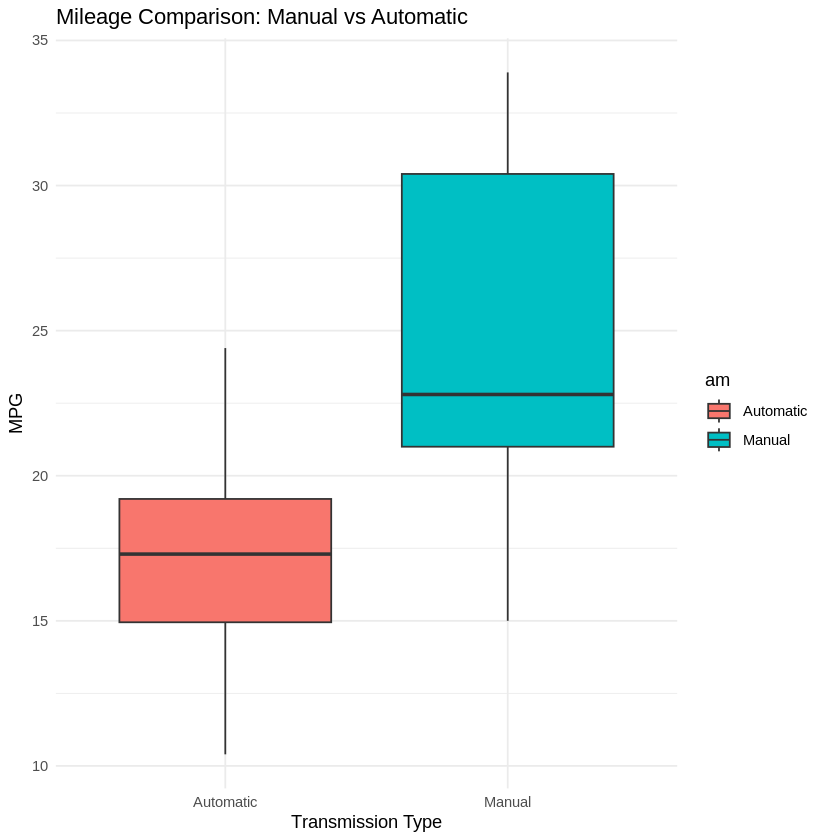


Building Linear Regression Model...



Call:
lm(formula = mpg ~ wt + hp, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.941 -1.600 -0.182  1.050  5.854 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.22727    1.59879  23.285  < 2e-16 ***
wt          -3.87783    0.63273  -6.129 1.12e-06 ***
hp          -0.03177    0.00903  -3.519  0.00145 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.593 on 29 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8148 
F-statistic: 69.21 on 2 and 29 DF,  p-value: 9.109e-12



Actual vs Predicted MPG (first 6 rows):


,car_name,mpg,predicted_mpg
,<chr>,<dbl>,<dbl>
1,Mazda RX4,21.0,23.57233
2,Mazda RX4 Wag,21.0,22.58348
3,Datsun 710,22.8,25.27582
4,Hornet 4 Drive,21.4,21.26502
5,Hornet Sportabout,18.7,18.32727
6,Valiant,18.1,20.47382



=== KEY INSIGHTS ===
1. Mileage decreases as weight and horsepower increase.
2. Manual cars generally give better mileage.
3. Weight is the strongest predictor of MPG.

=== PROJECT COMPLETED SUCCESSFULLY ===


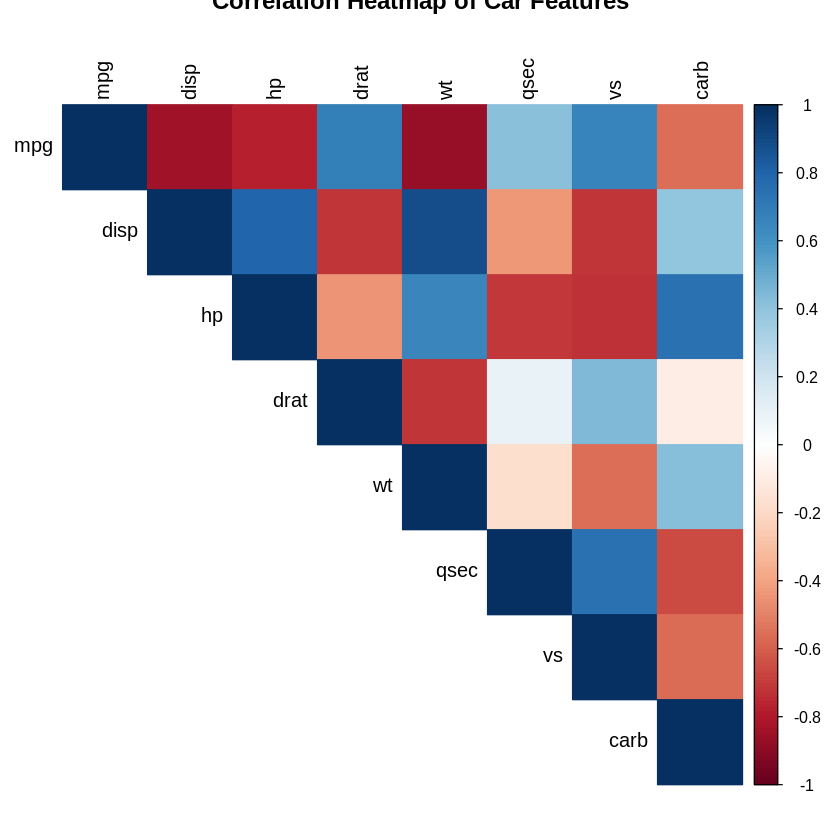

In [9]:
# ============================================
# Car Data Analysis Project (Beginner Version)
# ============================================

# 1. Load required libraries
# (Install once if not already installed)

install.packages(c( "ggplot2", "corrplot","dplyr" ))
library(ggplot2)
library(dplyr)
library(corrplot)

cat("Libraries loaded successfully!\n\n")

# 2. Load dataset (mtcars is built-in in R)
data <- mtcars
cat("Dataset loaded successfully!\n")

# Add car names as a column
data$car_name <- rownames(data)
rownames(data) <- NULL

# 3. Basic data exploration
cat("\nDataset dimensions:\n")
print(dim(data))

cat("\nFirst 6 rows of data:\n")
head(data)

cat("\nSummary statistics:\n")
summary(data)

# 4. Data cleaning
# Convert categorical variables into factors
data$cyl  <- factor(data$cyl)
data$am   <- factor(data$am, labels = c("Automatic", "Manual"))
data$gear <- factor(data$gear)

cat("\nData cleaning completed!\n")

# 5. Data Visualization

# 5.1 MPG Distribution
ggplot(data, aes(x = mpg)) +
  geom_histogram(bins = 10, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Mileage (MPG)",
       x = "Miles Per Gallon",
       y = "Number of Cars") +
  theme_minimal()

# 5.2 MPG vs Horsepower
ggplot(data, aes(x = hp, y = mpg)) +
  geom_point(color = "red", size = 3) +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Horsepower vs Mileage",
       x = "Horsepower",
       y = "MPG") +
  theme_minimal()

# 5.3 MPG by Transmission Type
ggplot(data, aes(x = am, y = mpg, fill = am)) +
  geom_boxplot() +
  labs(title = "Mileage Comparison: Manual vs Automatic",
       x = "Transmission Type",
       y = "MPG") +
  theme_minimal()

# 6. Correlation Analysis
numeric_data <- data %>% select_if(is.numeric)

cor_matrix <- cor(numeric_data)

cat("\nCorrelation Matrix:\n")
print(round(cor_matrix, 2))

# Correlation heatmap
corrplot(cor_matrix,
         method = "color",
         type = "upper",
         tl.col = "black",
         title = "Correlation Heatmap of Car Features")

# 7. Simple Predictive Model (Linear Regression)

cat("\nBuilding Linear Regression Model...\n")

model <- lm(mpg ~ wt + hp, data = data)
summary(model)

# Add predicted MPG
data$predicted_mpg <- predict(model)

cat("\nActual vs Predicted MPG (first 6 rows):\n")
head(data[, c("car_name", "mpg", "predicted_mpg")])

# 8. Key Insights
cat("\n=== KEY INSIGHTS ===\n")
cat("1. Mileage decreases as weight and horsepower increase.\n")
cat("2. Manual cars generally give better mileage.\n")
cat("3. Weight is the strongest predictor of MPG.\n")

cat("\n=== PROJECT COMPLETED SUCCESSFULLY ===\n")
